In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# --- Load Dataset ---
file_path = "D:/Intellify Hackathon/CropPlanner Datasets/Crop_production.csv"  
df = pd.read_csv(file_path)

print("✅ Dataset loaded successfully!")
print("Shape of dataset:", df.shape)
display(df.head())


✅ Dataset loaded successfully!
Shape of dataset: (99849, 13)


,Unnamed: 0,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
0,0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671
1,1,andhra pradesh,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030
2,2,andhra pradesh,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901
3,3,andhra pradesh,kharif,maize,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000
4,4,andhra pradesh,kharif,moong,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615


In [4]:
# EDA 
# --- Basic Info ---
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Descriptive Statistics ---")
display(df.describe(include='all').T)



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          99849 non-null  int64  
 1   State_Name          99849 non-null  object 
 2   Crop_Type           99849 non-null  object 
 3   Crop                99849 non-null  object 
 4   N                   99849 non-null  int64  
 5   P                   99849 non-null  int64  
 6   K                   99849 non-null  int64  
 7   pH                  99849 non-null  float64
 8   rainfall            99849 non-null  float64
 9   temperature         99849 non-null  float64
 10  Area_in_hectares    99849 non-null  float64
 11  Production_in_tons  99849 non-null  float64
 12  Yield_ton_per_hec   99849 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 9.9+ MB
None

--- Missing Values ---
Unnamed: 0            0
State_Name         

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,99849.0,NaN,NaN,NaN,49924.0,28824.067851,0.0,24962.0,49924.0,74886.0,99848.0
State_Name,99849,33,uttar pradesh,12598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crop_Type,99849,4,kharif,38758,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crop,99849,53,rice,11430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N,99849.0,NaN,NaN,NaN,69.816823,39.571469,10.0,50.0,75.0,80.0,180.0
P,99849.0,NaN,NaN,NaN,41.593656,15.056508,10.0,40.0,40.0,60.0,125.0
K,99849.0,NaN,NaN,NaN,42.037827,28.430263,10.0,20.0,30.0,50.0,200.0
pH,99849.0,NaN,NaN,NaN,5.643624,0.505283,3.82,5.36,5.54,5.96,7.0
rainfall,99849.0,NaN,NaN,NaN,701.151085,604.701552,3.274569,157.31,579.75,1110.78,3322.06
temperature,99849.0,NaN,NaN,NaN,26.684154,4.851214,1.18,23.106,27.333333,29.266667,35.346667


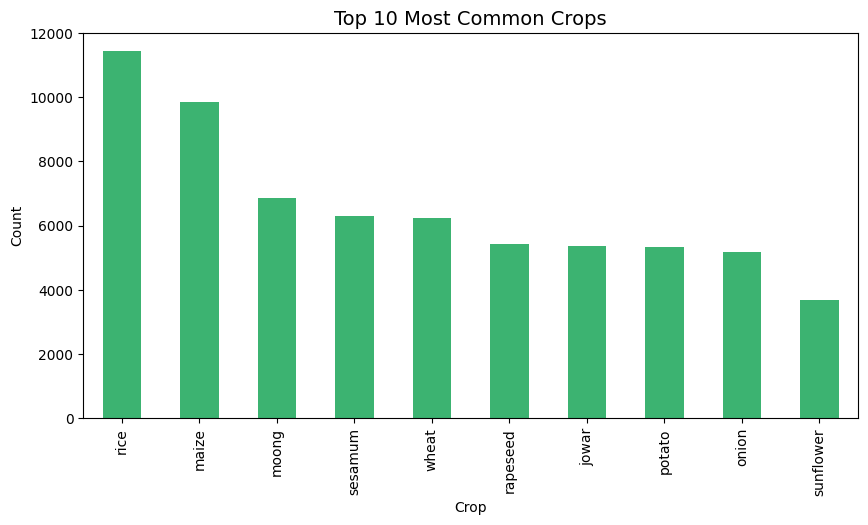

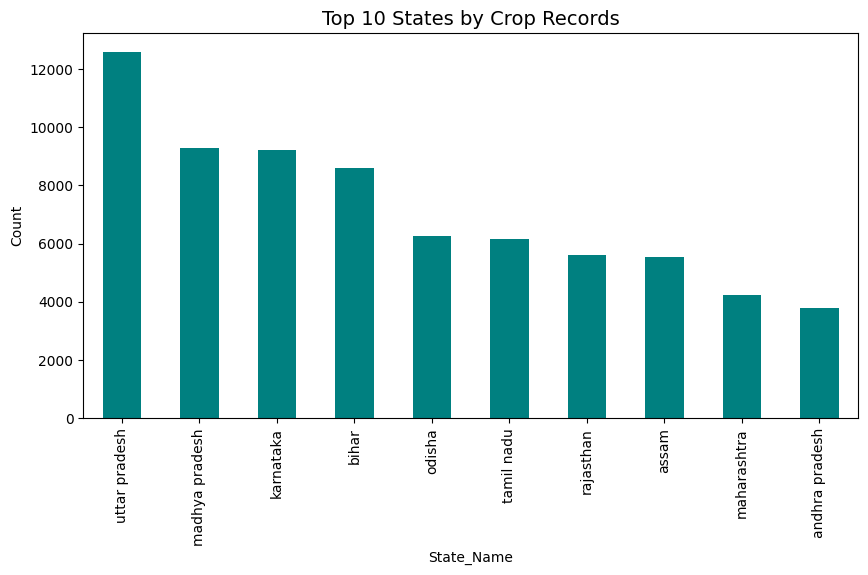

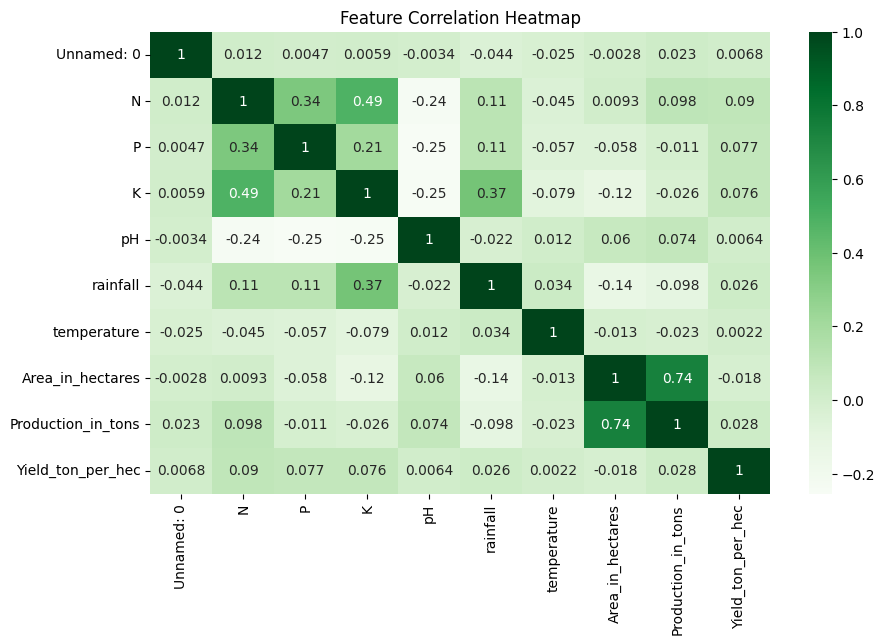

In [5]:
# --- Distribution of Crops ---
plt.figure(figsize=(10, 5))
df['Crop'].value_counts().head(10).plot(kind='bar', color='mediumseagreen')
plt.title("Top 10 Most Common Crops", fontsize=14)
plt.ylabel("Count")
plt.show()

# --- State Distribution ---
plt.figure(figsize=(10, 5))
df['State_Name'].value_counts().head(10).plot(kind='bar', color='teal')
plt.title("Top 10 States by Crop Records", fontsize=14)
plt.ylabel("Count")
plt.show()

# --- Correlation Heatmap ---
numeric_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Greens')
plt.title("Feature Correlation Heatmap")
plt.show()


In [6]:
# --- Encode Categorical Variables ---
le_crop = LabelEncoder()
le_state = LabelEncoder()
le_type = LabelEncoder()

df["Crop_Encoded"] = le_crop.fit_transform(df["Crop"])
df["State_Encoded"] = le_state.fit_transform(df["State_Name"])
df["CropType_Encoded"] = le_type.fit_transform(df["Crop_Type"])

# --- Feature Engineering ---
df["NPK_Sum"] = df["N"] + df["P"] + df["K"]
df["NPK_Ratio"] = df["N"] / (df["P"] + df["K"] + 1)
df["Production_per_Hectare"] = df["Production_in_tons"] / (df["Area_in_hectares"] + 1)

print("\n✅ Feature engineering complete!")
display(df.head())



✅ Feature engineering complete!


,Unnamed: 0,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec,Crop_Encoded,State_Encoded,CropType_Encoded,NPK_Sum,NPK_Ratio,Production_per_Hectare
0,0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671,18,1,0,180,1.967213,1.287495
1,1,andhra pradesh,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030,24,1,0,100,0.246914,0.302939
2,2,andhra pradesh,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901,26,1,0,160,0.987654,1.009801
3,3,andhra pradesh,kharif,maize,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000,29,1,0,140,1.311475,1.749375
4,4,andhra pradesh,kharif,moong,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615,31,1,0,80,0.327869,0.384320


In [8]:
# ============================================================
# ⚙️ PART 2 - MODEL TRAINING & COMPARISON
# ============================================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Define Features and Target ---
feature_cols = [
    "State_Encoded", "CropType_Encoded", "N", "P", "K", 
    "temperature", "pH", "rainfall", "Area_in_hectares", 
    "Production_in_tons", "NPK_Sum", "NPK_Ratio", "Production_per_Hectare"
]

X = df[feature_cols]
y = df["Crop_Encoded"]

# --- Split Data (70-30 split) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --- Scale Features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 69894, Testing samples: 29955


In [9]:
# --- Import Models ---
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# --- Initialize Models ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42, eval_metric='mlogloss'),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}

# --- Train & Evaluate ---
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    })
    print(f"{name} ✅ Trained")

# --- Results DataFrame ---
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
display(results_df)


Logistic Regression ✅ Trained
Random Forest ✅ Trained
XGBoost ✅ Trained
SVM ✅ Trained


,Model,Accuracy,Precision,Recall,F1 Score
1,Random Forest,0.988282,0.988430,0.988282,0.988334
2,XGBoost,0.987281,0.987433,0.987281,0.987336
3,SVM,0.968353,0.969835,0.968353,0.968833
0,Logistic Regression,0.957670,0.956875,0.957670,0.956691


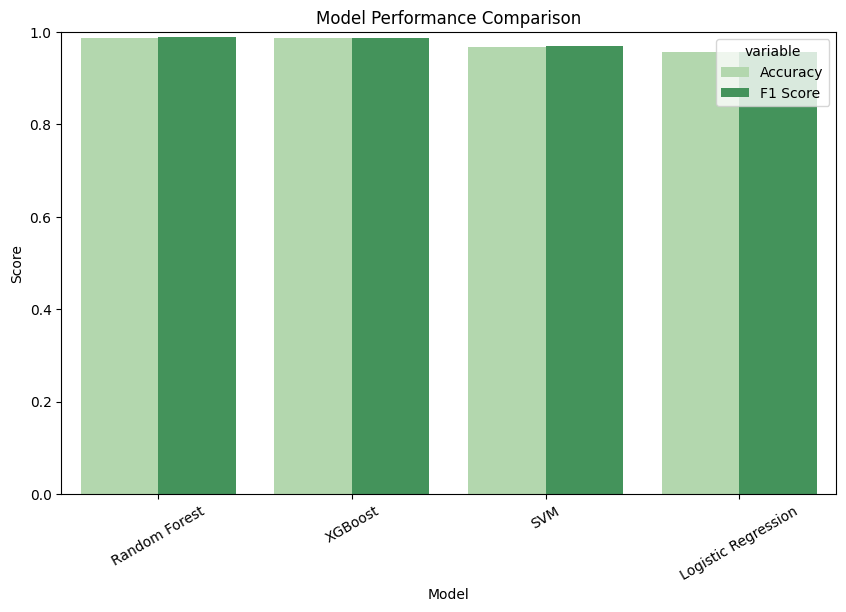

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(data=results_df.melt(id_vars='Model', value_vars=['Accuracy', 'F1 Score']),
            x='Model', y='value', hue='variable', palette='Greens')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=30)
plt.ylim(0,1)
plt.show()


In [11]:
best_model_name = results_df.iloc[0]["Model"]
best_accuracy = results_df.iloc[0]["Accuracy"]

print(f"🏆 Best Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")


🏆 Best Model: Random Forest with Accuracy: 0.9883


In [12]:
# ============================================================
# 🎛 PART 3 - RANDOM FOREST HYPERPARAMETER TUNING
# ============================================================

from sklearn.model_selection import GridSearchCV

# --- Define Parameter Grid ---
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# --- Initialize Model ---
rf = RandomForestClassifier(random_state=42)

# --- Grid Search ---
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='accuracy',
    verbose=2
)

print("🔍 Tuning hyperparameters... This may take a few minutes.")
grid_search.fit(X_train_scaled, y_train)

# --- Best Parameters ---
best_params = grid_search.best_params_
print("\n✅ Best Parameters Found:")
for key, val in best_params.items():
    print(f"{key}: {val}")

# --- Best Model ---
best_rf_model = grid_search.best_estimator_

# --- Evaluate on Test Set ---
from sklearn.metrics import accuracy_score

y_pred_best = best_rf_model.predict(X_test_scaled)
tuned_accuracy = accuracy_score(y_test, y_pred_best)
print(f"\n🎯 Tuned Random Forest Accuracy: {tuned_accuracy:.4f}")


🔍 Tuning hyperparameters... This may take a few minutes.
Fitting 3 folds for each of 216 candidates, totalling 648 fits

✅ Best Parameters Found:
bootstrap: False
max_depth: 20
min_samples_leaf: 1
min_samples_split: 5
n_estimators: 200

🎯 Tuned Random Forest Accuracy: 0.9885


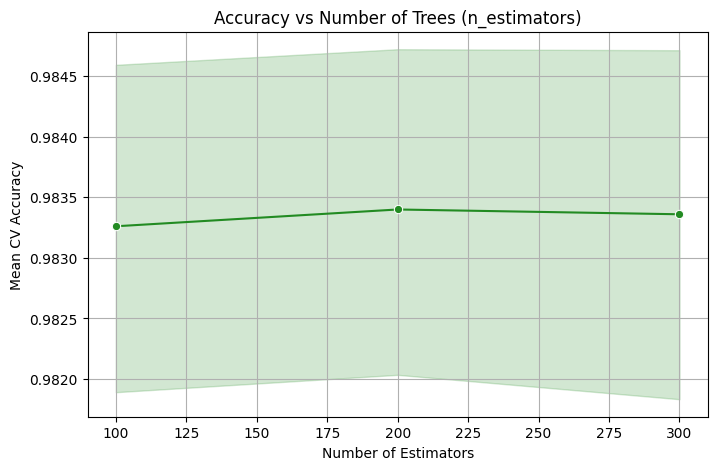

TypeError: '<' not supported between instances of 'NoneType' and 'int'

<Figure size 800x500 with 0 Axes>

In [13]:
# --- Extract Grid Search Results ---
results = pd.DataFrame(grid_search.cv_results_)

# --- Plot Accuracy vs n_estimators ---
plt.figure(figsize=(8,5))
sns.lineplot(x='param_n_estimators', y='mean_test_score', data=results, marker='o', color='forestgreen')
plt.title("Accuracy vs Number of Trees (n_estimators)")
plt.xlabel("Number of Estimators")
plt.ylabel("Mean CV Accuracy")
plt.grid(True)
plt.show()

# --- Plot Accuracy vs max_depth ---
plt.figure(figsize=(8,5))
sns.boxplot(x='param_max_depth', y='mean_test_score', data=results, palette='Greens')
plt.title("Accuracy vs Tree Depth (max_depth)")
plt.xlabel("Max Depth")
plt.ylabel("Mean CV Accuracy")
plt.grid(True)
plt.show()


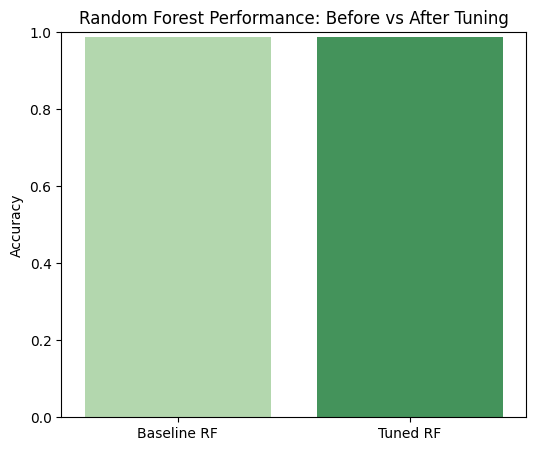

📊 Baseline Accuracy: 0.9883
🚀 Tuned Accuracy: 0.9885
Improvement: 0.02%


In [14]:
baseline_rf = RandomForestClassifier(random_state=42)
baseline_rf.fit(X_train_scaled, y_train)
baseline_pred = baseline_rf.predict(X_test_scaled)

baseline_accuracy = accuracy_score(y_test, baseline_pred)

plt.figure(figsize=(6,5))
sns.barplot(x=['Baseline RF', 'Tuned RF'], y=[baseline_accuracy, tuned_accuracy], palette='Greens')
plt.title("Random Forest Performance: Before vs After Tuning")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

print(f"📊 Baseline Accuracy: {baseline_accuracy:.4f}")
print(f"🚀 Tuned Accuracy: {tuned_accuracy:.4f}")
print(f"Improvement: {(tuned_accuracy - baseline_accuracy)*100:.2f}%")


In [15]:
# ============================================================
# 📈 PART 4 - FINAL EVALUATION & FEATURE IMPORTANCE
# ============================================================

from sklearn.metrics import classification_report, confusion_matrix

# --- Predictions on Test Set ---
y_pred_final = best_rf_model.predict(X_test_scaled)

# --- Evaluation Metrics ---
accuracy = accuracy_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final, average='weighted')
precision = precision_score(y_test, y_pred_final, average='weighted')
recall = recall_score(y_test, y_pred_final, average='weighted')

print("\n🎯 FINAL MODEL PERFORMANCE (Random Forest Tuned)")
print("-------------------------------------------------")
print(f"✅ Accuracy  : {accuracy:.4f}")
print(f"✅ Precision : {precision:.4f}")
print(f"✅ Recall    : {recall:.4f}")
print(f"✅ F1 Score  : {f1:.4f}")

# --- Classification Report ---
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_final))



🎯 FINAL MODEL PERFORMANCE (Random Forest Tuned)
-------------------------------------------------
✅ Accuracy  : 0.9885
✅ Precision : 0.9887
✅ Recall    : 0.9885
✅ F1 Score  : 0.9886

📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00       346
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00       723
           4       1.00      1.00      1.00       942
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        17
           8       1.00      1.00      1.00       171
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        85
          11       1.00      1.00      1.00        38
          12       1.00      1.00      1.00        71
          13       1.00      1.00 

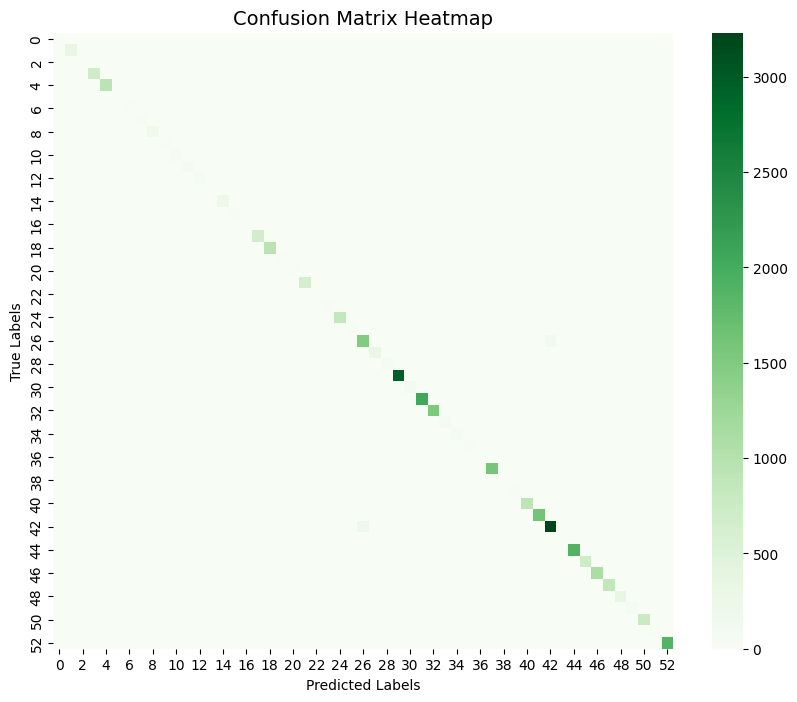

In [16]:
# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(10,8))
sns.heatmap(cm, cmap='Greens', cbar=True)
plt.title("Confusion Matrix Heatmap", fontsize=14)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


<Axes: >

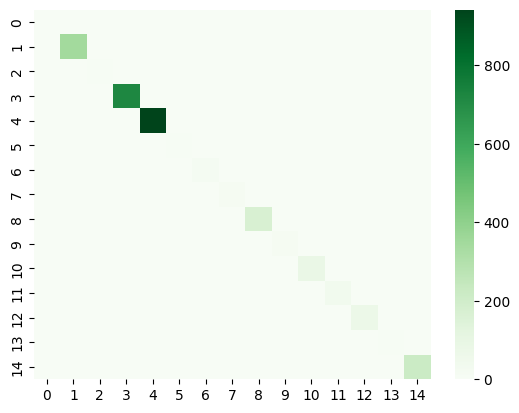

In [17]:
sns.heatmap(cm[:15, :15], cmap='Greens')

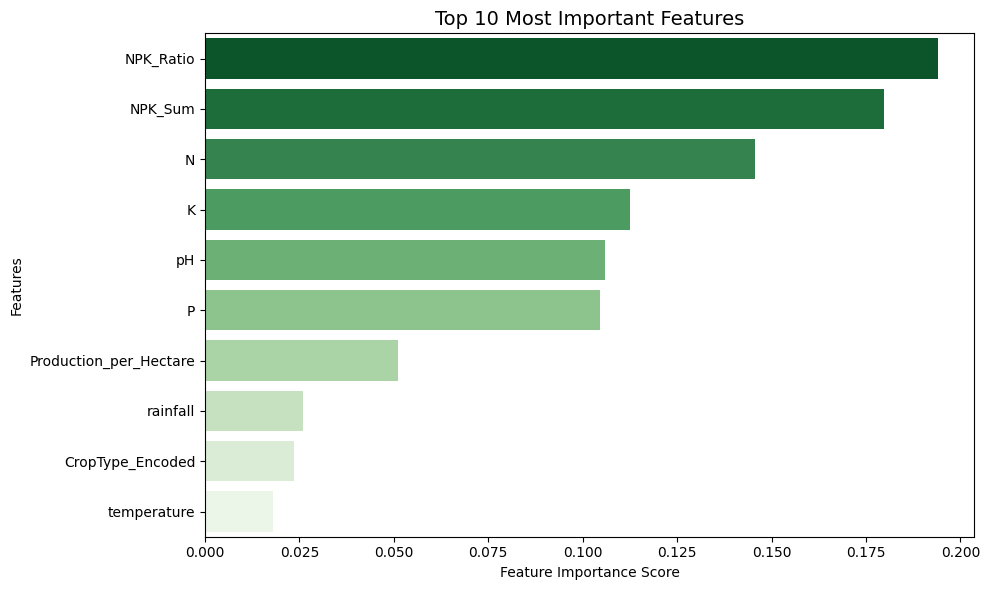

In [18]:
# --- Feature Importance ---
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# --- Plot Top Features ---
plt.figure(figsize=(10,6))
sns.barplot(
    x=importances[indices][:10],
    y=np.array(feature_cols)[indices][:10],
    palette="Greens_r"
)
plt.title("Top 10 Most Important Features", fontsize=14)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [19]:
# ============================================================
# 💾 PART 5 - SAVE MODEL & ARTIFACTS
# ============================================================

import pickle

# --- Save Trained Model ---
with open("crop_rf_tuned_model.pkl", "wb") as f:
    pickle.dump(best_rf_model, f)

# --- Save Scaler ---
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# --- Save Label Encoders ---
encoders = {
    "crop": le_crop,
    "state": le_state,
    "crop_type": le_type
}

with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)

# --- Save Feature Columns ---
with open("feature_columns.pkl", "wb") as f:
    pickle.dump(feature_cols, f)

print("✅ Model and preprocessing artifacts saved successfully!")


✅ Model and preprocessing artifacts saved successfully!


In [20]:
# --- Model Summary Report ---
summary = {
    "Best_Model": "Random Forest (Tuned)",
    "Best_Params": best_params,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1_Score": f1,
    "Top_Features": list(np.array(feature_cols)[indices][:5])
}

print("\n📋 MODEL SUMMARY REPORT")
for k, v in summary.items():
    print(f"{k}: {v}")

# --- Save Summary Report ---
with open("model_summary.pkl", "wb") as f:
    pickle.dump(summary, f)



📋 MODEL SUMMARY REPORT
Best_Model: Random Forest (Tuned)
Best_Params: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.9884827240861291
Precision: 0.9887187304510826
Recall: 0.9884827240861291
F1_Score: 0.9885558712797875
Top_Features: [np.str_('NPK_Ratio'), np.str_('NPK_Sum'), np.str_('N'), np.str_('K'), np.str_('pH')]


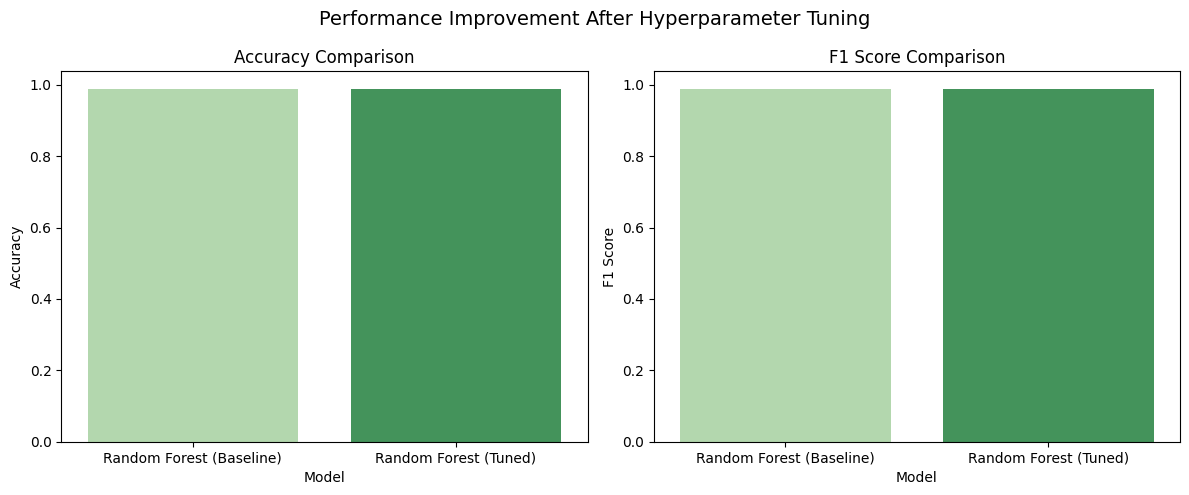

In [21]:
# --- Visualize Model Comparison (Before vs After Tuning) ---
comparison = pd.DataFrame({
    "Model": ["Random Forest (Baseline)", "Random Forest (Tuned)"],
    "Accuracy": [baseline_accuracy, accuracy],
    "F1 Score": [f1_score(y_test, baseline_pred, average='weighted'), f1]
})

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(data=comparison, x="Model", y="Accuracy", ax=axes[0], palette="Greens")
sns.barplot(data=comparison, x="Model", y="F1 Score", ax=axes[1], palette="Greens")

axes[0].set_title("Accuracy Comparison")
axes[1].set_title("F1 Score Comparison")

plt.suptitle("Performance Improvement After Hyperparameter Tuning", fontsize=14)
plt.tight_layout()
plt.show()
